# Question 01: Gaussian Bayes Classifier


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('/content/iris.csv')
print(dataset)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
print(dataset.isnull().sum())
del dataset['Id']

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
print(dataset.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [ ]:
# as the species is of object type, we encode it
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
encoding = {'Species':{"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2 }}
dataset = dataset.replace(encoding)
dataset['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [ ]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Exploratory Analysis

Counter({0: 50, 1: 50, 2: 50})
[50, 50, 50]


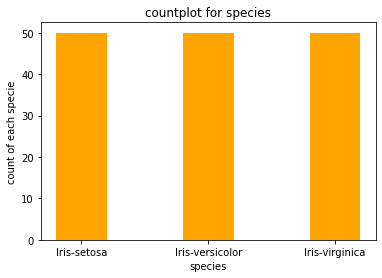

In [ ]:

from collections import Counter
species_d=Counter(dataset['Species'])
print(species_d)
count = list(species_d.values())
print(count)
species = list(['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.bar(species, count, color ='orange',
        width = 0.4)
 
plt.xlabel("species")
plt.ylabel("count of each specie")
plt.title("countplot for species")
plt.show()

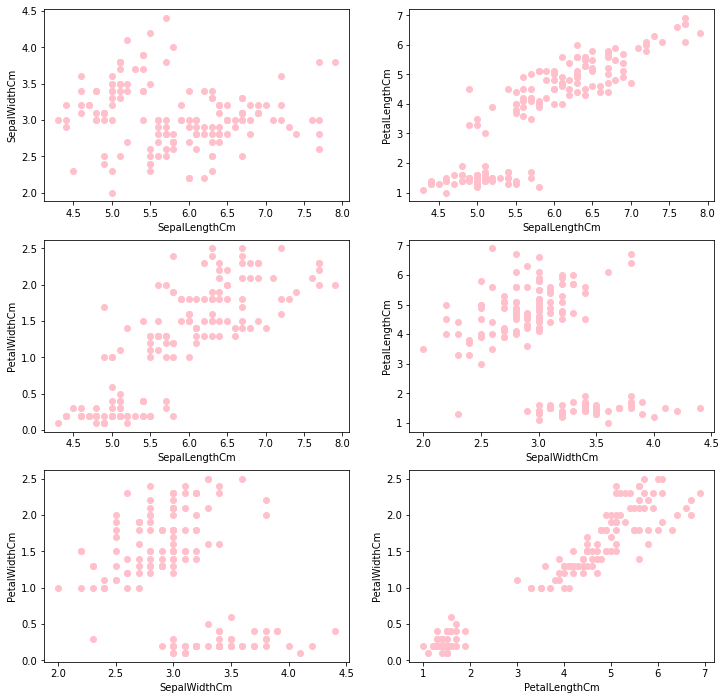

In [ ]:
#we plot scatter plot with each pair of features 
figure, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(0,3,1):
    for j in range(i+1,4):
        x_axis = int(index/2)
        y_axis = index % 2
        axes[x_axis][y_axis].scatter(dataset[dataset.columns[i]], dataset[dataset.columns[j]], color='pink')
        axes[x_axis][y_axis].set_xlabel(dataset.columns[i])
        axes[x_axis][y_axis].set_ylabel(dataset.columns[j])
        index = index + 1



In [ ]:
#dividing dataset based on species
class_0th = dataset[dataset['Species']==0]
class_1th = dataset[dataset['Species']==1]
class_2th = dataset[dataset['Species']==2]

Text(0.5, 1.0, 'Iris-virginica ')

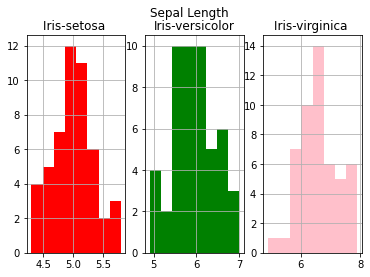

In [ ]:
#analysis of sepal length for different species using histogram
fig, axes = plt.subplots(1, 3)
fig.suptitle('Sepal Length')
class_0th['SepalLengthCm'].hist(bins=8,ax=axes[0],color='red')
axes[0].set_title("Iris-setosa ")
class_1th['SepalLengthCm'].hist(bins=8,ax=axes[1],color='green')
axes[1].set_title("Iris-versicolor")
class_2th['SepalLengthCm'].hist(bins=8,ax=axes[2],color='pink')
axes[2].set_title("Iris-virginica ")

Text(0.5, 1.0, 'Iris-virginica ')

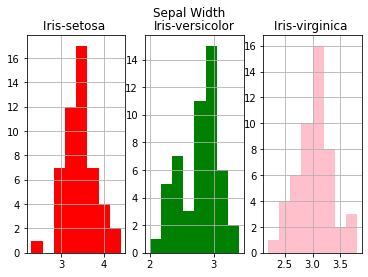

In [ ]:
#analysis of sepal width for different species using histogram
fig, axes = plt.subplots(1, 3)
fig.suptitle('Sepal Width')
class_0th['SepalWidthCm'].hist(bins=8,ax=axes[0],color='red')
axes[0].set_title("Iris-setosa ")
class_1th['SepalWidthCm'].hist(bins=8,ax=axes[1],color='green')
axes[1].set_title("Iris-versicolor")
class_2th['SepalWidthCm'].hist(bins=8,ax=axes[2],color='pink')
axes[2].set_title("Iris-virginica ")

Text(0.5, 1.0, 'Iris-virginica ')

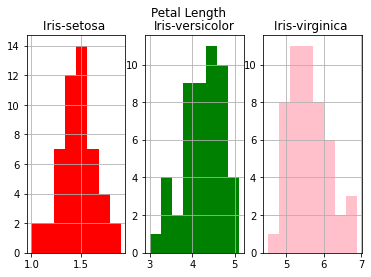

In [ ]:
#analysis of petal length for different species using histogram
fig, axes = plt.subplots(1, 3)
fig.suptitle('Petal Length')
class_0th['PetalLengthCm'].hist(bins=8,ax=axes[0],color='red')
axes[0].set_title("Iris-setosa ")
class_1th['PetalLengthCm'].hist(bins=8,ax=axes[1],color='green')
axes[1].set_title("Iris-versicolor")
class_2th['PetalLengthCm'].hist(bins=8,ax=axes[2],color='pink')
axes[2].set_title("Iris-virginica ")

Text(0.5, 1.0, 'Iris-virginica ')

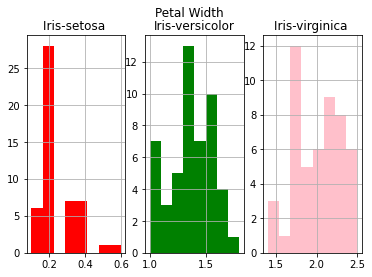

In [ ]:
#analysis of petal length for different species using histogram
fig, axes = plt.subplots(1, 3)
fig.suptitle('Petal Width')
class_0th['PetalWidthCm'].hist(bins=8,ax=axes[0],color='red')
axes[0].set_title("Iris-setosa ")
class_1th['PetalWidthCm'].hist(bins=8,ax=axes[1],color='green')
axes[1].set_title("Iris-versicolor")
class_2th['PetalWidthCm'].hist(bins=8,ax=axes[2],color='pink')
axes[2].set_title("Iris-virginica ")

In [ ]:
dataset
print(Counter(dataset['Species']))

Counter({0: 50, 1: 50, 2: 50})


## Splitting the data

In [ ]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
print(x)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:

print("Training size:",(x_train.shape[0]/(len(dataset)))*100,'%')
print("Testing size:",(x_test.shape[0]/len(dataset)*100),'%')

Training size: 70.0 %
Testing size: 30.0 %


In [ ]:
print(x_train,y_train)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
118            7.7           2.6            6.9           2.3
18             5.7           3.8            1.7           0.3
4              5.0           3.6            1.4           0.2
45             4.8           3.0            1.4           0.3
59             5.2           2.7            3.9           1.4
..             ...           ...            ...           ...
133            6.3           2.8            5.1           1.5
137            6.4           3.1            5.5           1.8
72             6.3           2.5            4.9           1.5
140            6.7           3.1            5.6           2.4
37             4.9           3.1            1.5           0.1

[105 rows x 4 columns] 118    2
18     0
4      0
45     0
59     1
      ..
133    2
137    2
72     1
140    2
37     0
Name: Species, Length: 105, dtype: int64


In [ ]:
print(x_test,y_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
14             5.8           4.0            1.2           0.2
98             5.1           2.5            3.0           1.1
75             6.6           3.0            4.4           1.4
16             5.4           3.9            1.3           0.4
131            7.9           3.8            6.4           2.0
56             6.3           3.3            4.7           1.6
141            6.9           3.1            5.1           2.3
44             5.1           3.8            1.9           0.4
29             4.7           3.2            1.6           0.2
120            6.9           3.2            5.7           2.3
94             5.6           2.7            4.2           1.3
5              5.4           3.9            1.7           0.4
102            7.1           3.0            5.9           2.1
51             6.4           3.2            4.5           1.5
78             6.0           2.9            4.5           1.5
42      

##Q1. Implement a Gaussian Bayes Classifier class from scratch.(You are not allowed to use the inbuilt scikit function, you are only allowed to use numpy and pandas). The classifier class must have 3 variants defined using its constructor, for each of the cases given below.

# **Part 1,2 and 3**

In [ ]:
import math
class Gaussian:
  def __init__(self,case):
    self.case=case
    self.df=None
  def train(self,x_train,y_train):
    self.df=x_train.copy()
    self.df['output']=y_train
  def g_i_x(self,class_label,feature_vector):
    mean=np.array(np.mean(self.df[self.df.iloc[:,-1]==class_label].iloc[:,:-1]))
    feature_vector=np.array(feature_vector)
    cov_mat=[]
    prior_prob=len(self.df[self.df.iloc[:,-1]==class_label])/len(self.df)
    if(self.case==1):
      cov_mat=self.df.iloc[:,:-1].cov().to_numpy()[0,0]*np.identity(len(feature_vector))
    elif(self.case==2):
      cov_mat=self.df.iloc[:,:-1].cov().to_numpy()
    elif(self.case==3):
      cov_mat=self.df[self.df.iloc[:,-1]==class_label].iloc[:,:-1].cov().to_numpy()
    cov_inv=np.linalg.inv(cov_mat)
    if(prior_prob==0):
      prior_prob=1/len(self.df)
    return -(0.5)*((feature_vector-mean)@cov_inv@((feature_vector-mean).T))+math.log(prior_prob)-(0.5)*(math.log(abs(np.linalg.det(cov_mat))))
  def get_max(self,g_i_x_vector):
    max_g=g_i_x_vector[0]
    pred=0
    for i in range(len(g_i_x_vector)):
      if(max_g<g_i_x_vector[i]):
        max_g=g_i_x_vector[i]
        pred=i
    return pred
  def predict(self,feature_vector):
    g_i_x_vector=[]
    num_class=len(set(self.df.iloc[:,-1]))
    for i in range(num_class):
      g_i_x_vector.append(self.g_i_x(i,feature_vector))
    return self.get_max(g_i_x_vector)
  def test(self,x_test,y_test):
    y_pred=[]
    for i in range(len(x_test)):
      feature_vector=x_test.iloc[i,:]
      y_pred.append(self.predict(feature_vector))
    y_test=list(y_test)
    count=0
    for i in range(len(y_test)):
      if(y_test[i]==y_pred[i]):
        count+=1
    return np.array(y_pred),(count/len(x_test))*100
  def plot_helper(self,x_test):
    y_pred=[]
    for i in range(len(x_test)):
      feature_vector=x_test.iloc[i,:]
      y_pred.append(self.predict(feature_vector))
    return np.array(y_pred)
  def grid_maker(self,x1,x2):
    x1=np.array(x1)
    x2=np.array(x2)
    x1_min,x1_max=x1.min()-1,x1.max()+1
    x2_min,x2_max=x2.min()-1,x2.max()+1
    a=np.arange(x1_min,x1_max,0.05)
    b=np.arange(x2_min,x2_max,0.05)
    return np.meshgrid(a,b)
  def plot_decision_boundary(self,feature_1,feature_2):
    x,y=self.grid_maker(self.df[feature_1],self.df[feature_2])
    df=pd.DataFrame(np.c_[x.ravel(),y.ravel()],columns=self.df.columns[:-1])
    predicted=self.plot_helper(df).reshape(x.shape)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.contourf(x,y,predicted,cmap=plt.cm.coolwarm)
    plt.scatter(self.df[feature_1],self.df[feature_2],c=self.df.iloc[:,-1],cmap=plt.cm.coolwarm)
    plt.show()

In [ ]:
model=Gaussian(1)
model.train(x_train,y_train)

In [ ]:
y_predicted,accuracy=model.test(x_test,y_test)

In [ ]:
print(y_predicted)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


In [ ]:
print(accuracy)

95.55555555555556


In [ ]:
model=Gaussian(2)
model.train(x_train,y_train)

In [ ]:
y_predicted,accuracy=model.test(x_test,y_test)

In [ ]:
print(y_predicted)

[0 1 1 0 2 2 2 0 0 2 1 0 2 2 2 0 1 2 0 0 1 2 2 0 2 1 0 0 1 1 1 2 1 2 2 0 1
 0 1 1 2 0 1 2 1]


In [ ]:
print(accuracy)

80.0


In [ ]:
model=Gaussian(3)
model.train(x_train,y_train)

In [ ]:
y_predicted,accuracy=model.test(x_test,y_test)

In [ ]:
print(y_predicted)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


In [ ]:
print(accuracy)

100.0


In [ ]:
df=x_train.iloc[:,:2]
feature_1=x_train.columns[0]
feature_2=x_train.columns[1]
model=Gaussian(1)
model.train(df,y_train)

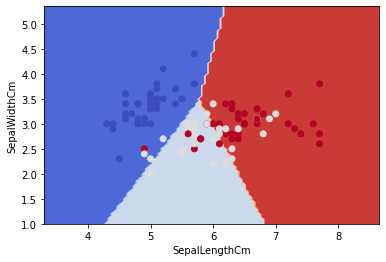

In [ ]:
model.plot_decision_boundary(feature_1,feature_2)

In [ ]:
df=x_train.iloc[:,:2]
feature_1=x_train.columns[0]
feature_2=x_train.columns[1]
model=Gaussian(2)
model.train(df,y_train)

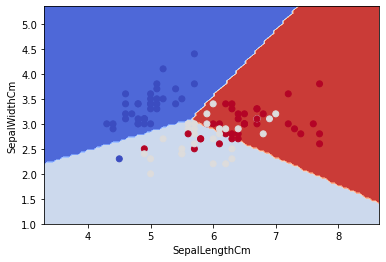

In [ ]:
model.plot_decision_boundary(feature_1,feature_2)

In [ ]:
df=x_train.iloc[:,:2]
feature_1=x_train.columns[0]
feature_2=x_train.columns[1]
model=Gaussian(3)
model.train(df,y_train)

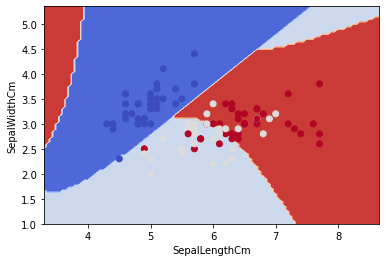

In [ ]:
model.plot_decision_boundary(feature_1,feature_2)

# **Part 4**

In [ ]:

import random
def perform_k_fold(case,training_data):
  model=Gaussian(case)
  score=[]
  li=random.sample(range(len(training_data)),len(training_data))
  splits=[li[:len(li)//5]]
  splits.append(li[len(li)//5:2*len(li)//5])
  splits.append(li[2*len(li)//5:3*len(li)//5])
  splits.append(li[3*len(li)//5:4*len(li)//5])
  splits.append(li[4*len(li)//5:])
  
  test_in=[]
  train_in=[]
  for i in range(5):
    for j in range(5):
      if(j==i):
        test_in=splits[j]
      else:
        train_in+=splits[j]
    train=training_data.iloc[train_in,:]
    test=training_data.iloc[test_in,:]
    model.train(train.iloc[:,:-1],train.iloc[:,-1])
    score.append(model.test(test.iloc[:,:-1],test.iloc[:,-1])[1])
  return score
training_data=x_train.copy()
training_data['output']=y_train
print(perform_k_fold(1,training_data))

[90.47619047619048, 85.71428571428571, 85.71428571428571, 95.23809523809523, 100.0]


In [ ]:
print(perform_k_fold(2,training_data))

[66.66666666666666, 100.0, 90.47619047619048, 76.19047619047619, 85.71428571428571]


In [ ]:
print(perform_k_fold(3,training_data))

[100.0, 95.23809523809523, 95.23809523809523, 100.0, 100.0]


# **Part 5**

In [ ]:
x1=np.array(random.sample(range(-1000,1000),500))
x1=x1/200
x2=np.array(random.sample(range(-1000,1000),500))
x2=x2/200
y=[]
for i in range(500):
  if(x1[i]**2+x2[i]**2<=9):
    y.append(0)
  else:
    y.append(1)
df=pd.DataFrame()
df['x']=x1
df['y']=x2
df['output']=y
df

,x,y,output
0,-4.140,0.520,1
1,4.735,4.425,1
2,1.030,-1.530,0
3,-1.000,1.490,0
4,4.590,2.180,1
...,...,...,...
495,-4.530,-1.465,1
496,0.875,0.515,0
497,0.940,1.895,0
498,4.890,-4.790,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],random_state=2,train_size=0.7)

In [ ]:
model=Gaussian(3)
model.train(x_train,y_train)

In [ ]:
y_predicted,accuracy=model.test(x_test,y_test)

In [ ]:
print(accuracy)

83.33333333333334


In [ ]:
print(y_predicted)

[1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1]


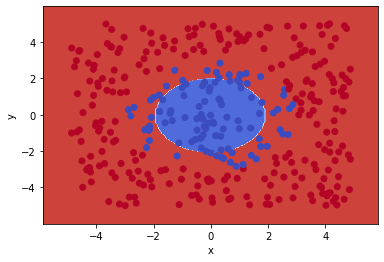

In [ ]:
feature_1='x'
feature_2='y'
model.plot_decision_boundary(feature_1,feature_2)

# Question 02: Mahalanobis Distance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
cov_mat=np.asmatrix([[1.5,0.5],[0.5,1.5]])
mean=[0,0]

In [ ]:
X = np.random.multivariate_normal(mean, cov_mat, size=300).T
x=X[0]
y=X[1]

In [ ]:
print(x)
print(y)

[ 5.58850022e-01 -1.53386360e+00  8.12870839e-01 -5.75737703e-01
 -2.54924732e-01  2.90237132e-01  7.51556311e-01  1.33132143e+00
 -5.47600393e-01  2.36053039e-01 -1.38368578e+00 -9.48240424e-01
 -1.97138881e-01 -1.87396373e+00 -1.76583067e+00 -6.37090801e-01
  1.86863366e+00 -8.33592533e-01 -2.14482643e+00 -1.53638901e+00
 -1.61379130e-01 -1.92803856e+00  8.97008674e-01 -1.16690109e+00
  6.10655929e-01 -3.02021125e-01  1.70969744e+00 -6.71760166e-01
  1.22498100e-01 -1.18603690e+00 -2.42218594e-01  8.50670046e-01
 -6.30711824e-01  1.03312340e+00 -7.09752526e-01 -1.22639176e+00
  4.38340578e-01 -1.70086994e+00  1.34219607e+00  5.43730858e-01
  3.28947566e+00 -1.91410281e+00 -6.86879923e-02 -1.44960047e+00
 -1.14774325e+00 -1.03069466e+00 -4.86959885e-01  1.51851482e+00
  3.15614282e+00 -2.06029793e-01  8.94934834e-01 -2.38483777e+00
  8.41463699e-02 -7.25505030e-01 -5.35306311e-01 -1.54665105e+00
  6.54209188e-01  1.69579697e+00 -4.45436496e-01  4.61774973e-01
 -1.78833514e+00  1.45301

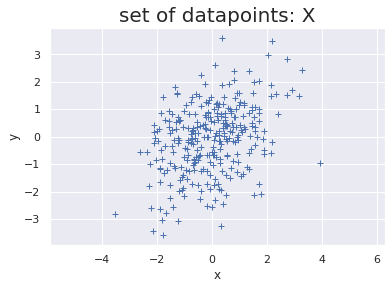

In [ ]:
plt.plot(x, y, '+')
plt.title('set of datapoints: X',fontsize=20)
plt.ylabel('y')
plt.xlabel('x')
plt.axis('equal')
plt.show()

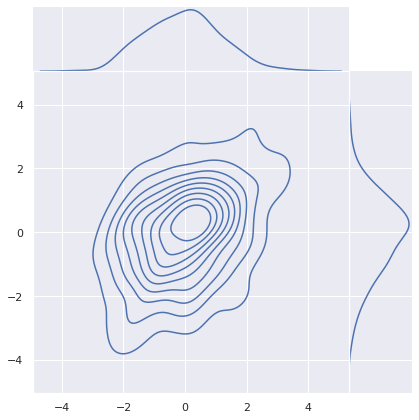

In [ ]:
# Plotting the density function.
sns.jointplot(x=x, y=y, kind="kde", space=0);

## Q1). Calculate the covariance matrix of the sample X , say Σs . Find the eigenvectors and eigenvalue of Σs and plot it superimposed on the datapoints X.

In [ ]:
def cov(x,y):
   sum=((np.array(x)-np.array(x).mean())*(np.array(y)-np.array(y).mean())).sum()
   number=len(x)-1
   return (sum/number)

In [ ]:
cov_matrix_Σs=[[cov(x,x),cov(x,y)],[cov(y,x),cov(y,y)]]
cov_matrix_Σs=np.array(cov_matrix_Σs)
print(cov_matrix_Σs )

[[1.44581137 0.54555525]
 [0.54555525 1.56025964]]


In [ ]:
eigen_values,eigen_vectors= np.linalg.eig((cov_matrix_Σs))

In [ ]:
print(eigen_values)

[0.9544873  2.05158371]


In [ ]:
print(eigen_vectors)

[[-0.74307444 -0.66920877]
 [ 0.66920877 -0.74307444]]


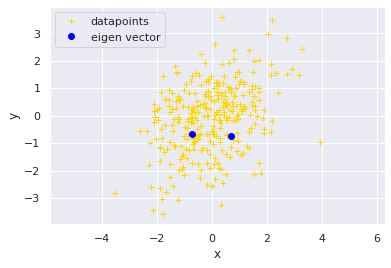

In [ ]:
plt.plot(x, y,'+',color='gold',label='datapoints')
plt.plot(np.array(eigen_vectors)[0][0],np.array(eigen_vectors)[0][1],'o',color='blue')
plt.plot(np.array(eigen_vectors)[1][0],np.array(eigen_vectors)[1][1],'o',color='blue',label='eigen vector')
plt.ylabel('y')
plt.xlabel('x')
plt.axis('equal')
plt.legend(loc="upper left")
plt.show()

## Q2). Perform the transformation 𝑌 = (Σs^(−1/2))𝑋 on the datapoints X. Calculate the covariance matrix of transformed datapoints Y , say Σy . Comment on the obtained covariance matrix and infer what was the purpose of the transformation.

In [ ]:
from scipy.linalg import fractional_matrix_power
power_Σs= fractional_matrix_power(cov_matrix_Σs,(-1/2))
print(power_Σs)

[[ 0.87783515 -0.16181385]
 [-0.16181385  0.84388934]]


In [ ]:
Y=[]
for i in range(len(x)):
    l=np.transpose(np.asmatrix([x[i],y[i]]))
    mat=np.array((power_Σs*l))
    #print(mat)
    Y.append([mat[0][0],mat[1][0]])
print(Y)



[[0.42374294203160223, 0.25812858640760455], [-0.9847894138301678, -1.6380801072276134], [0.3827357770934967, 1.593810501049925], [-0.38284468431580343, -0.5460009934603874], [-0.34949179057264734, 0.6968508787595952], [0.27924977243266164, -0.1745769518597869], [0.6832886905712194, -0.24440975520974564], [1.0293893558422447, 0.5110042695186411], [-0.4552933316795283, -0.04390614814972936], [0.012413713764255652, 0.9777317146737298], [-1.1923580875805677, 0.10765345473922154], [-0.6344769693516997, -0.8787605904290835], [-0.1694062169318012, 0.012868433848990501], [-1.5682875526618556, -0.09699923116924025], [-1.3376313508678743, -0.8223705736865778], [-0.40759203540443234, -0.6878901721703748], [1.6519619687961162, -0.36291739046074345], [-0.8627141277874619, 0.8178535310319992], [-1.3266334568105842, -2.5534703563215624], [-1.3709692228511832, 0.36476661075122496], [-0.25494621561532377, 0.6168997954821088], [-1.7364898108642668, 0.541398349145457], [0.89105818266847, -0.685610897622

In [ ]:
x_new=[]
y_new=[]
for i in range(len(Y)):
   x_new.append(Y[i][0])
   y_new.append(Y[i][1])

In [ ]:
print(x_new)
print(y_new)

[0.42374294203160223, -0.9847894138301678, 0.3827357770934967, -0.38284468431580343, -0.34949179057264734, 0.27924977243266164, 0.6832886905712194, 1.0293893558422447, -0.4552933316795283, 0.012413713764255652, -1.1923580875805677, -0.6344769693516997, -0.1694062169318012, -1.5682875526618556, -1.3376313508678743, -0.40759203540443234, 1.6519619687961162, -0.8627141277874619, -1.3266334568105842, -1.3709692228511832, -0.25494621561532377, -1.7364898108642668, 0.89105818266847, -1.1194095887553244, 0.5428794465869718, -0.26514152169017585, 1.7819206862698342, -0.4565602335315775, 0.4808223400584535, -0.7849521175236752, -0.2842370226722091, 0.628816696179568, -0.5763230028581728, 1.1371358591368899, -0.4545672204618861, -0.578759940377561, 0.36417707032549607, -1.5896347236303467, 1.276494173734822, 0.5941081980509908, 2.496065464651794, -1.2510505818780158, 0.16359069429283524, -1.219745818893537, -0.8272311819867173, -0.552532457796146, -0.3158855155797176, 1.6793593410765864, 2.53158

In [ ]:
cov_mat_Y=np.asmatrix([[cov(x_new,x_new),cov(x_new,y_new)],[cov(y_new,x_new),cov(y_new,y_new)]])
print(cov_mat_Y)

[[ 1.00000000e+00 -4.75279422e-17]
 [-4.75279422e-17  1.00000000e+00]]


## Q3). Uniformly sample 10 points on the curve 𝑥^2 + y^2 =25 . Let these set of points be called P . Plot 𝑃 along with the datapoints in X . Make sure to give each point a different color [Hint : You can use properties like hue to do this] for better visualization. Report the eucledian distance of each point from µ using barplot. [10 marks]


In [ ]:
import math

In [ ]:
def sampling():
  pi=math.pi
  x=[]
  y=[]
  i=0
  while(i<3):
      X=5*(math.cos((i)*(pi/5)))
      Y=math.sqrt(25-(X*X))
      x.append(X)
      y.append(Y)
      i+=1
  for i in range(3):
    X=-x[2-i]
    x.append(X)
    y.append(math.sqrt(25-(X*X)))
  x=x+x[4:0:-1]
  for i in range(1,5):
    y.append(-y[i])
  return x,y
P=sampling()
print(P)
x_P=P[0]
y_P=P[1]


([5.0, 4.045084971874737, 1.5450849718747373, -1.5450849718747373, -4.045084971874737, -5.0, -4.045084971874737, -1.5450849718747373, 1.5450849718747373, 4.045084971874737], [0.0, 2.9389262614623655, 4.755282581475767, 4.755282581475767, 2.9389262614623655, 0.0, -2.9389262614623655, -4.755282581475767, -4.755282581475767, -2.9389262614623655])


In [ ]:
for i in range(10):
  print(math.sqrt((x_P[i]*x_P[i])+(y_P[i]*y_P[i])))

5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

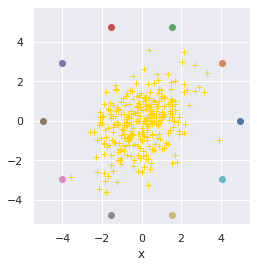

In [ ]:
plt.plot(x, y,'+',color='gold',label='datapoints')
for j in range(10):
    plt.scatter(P[0][j], P[1][j])
plt.xlabel('x')
plt.axis('square')
plt.show()

In [ ]:
def euclidean_dist(x,y,P2):
  l=[]
  for i in range(len(x)):
    X=(P2[0]-x[i])**2
    Y=(P2[1]-y[i])**2
    D=math.sqrt(X+Y)
    l.append(D)
  return l
euclidean_distance=euclidean_dist(x_P,y_P,mean)
print(euclidean_distance)

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [ ]:
P_xy=[]
for i in range(10):
  P_xy.append([x_P[i],y_P[i]])
print(P_xy)

[[5.0, 0.0], [4.045084971874737, 2.9389262614623655], [1.5450849718747373, 4.755282581475767], [-1.5450849718747373, 4.755282581475767], [-4.045084971874737, 2.9389262614623655], [-5.0, 0.0], [-4.045084971874737, -2.9389262614623655], [-1.5450849718747373, -4.755282581475767], [1.5450849718747373, -4.755282581475767], [4.045084971874737, -2.9389262614623655]]


In [ ]:
keys=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10']
DIC={}
for i in range(10):
  DIC[keys[i]]=P_xy[i]
print(DIC)

{'P1': [5.0, 0.0], 'P2': [4.045084971874737, 2.9389262614623655], 'P3': [1.5450849718747373, 4.755282581475767], 'P4': [-1.5450849718747373, 4.755282581475767], 'P5': [-4.045084971874737, 2.9389262614623655], 'P6': [-5.0, 0.0], 'P7': [-4.045084971874737, -2.9389262614623655], 'P8': [-1.5450849718747373, -4.755282581475767], 'P9': [1.5450849718747373, -4.755282581475767], 'P10': [4.045084971874737, -2.9389262614623655]}


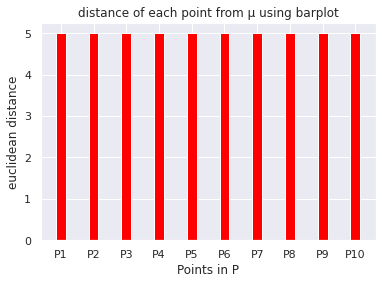

In [ ]:
#plotting barplot
plt.bar(keys,euclidean_distance , color ='red',
        width = 0.3)
 
plt.xlabel("Points in P")
plt.ylabel("euclidean distance")
plt.title("distance of each point from µ using barplot")
plt.show()

## Q4). Perform the transformation 𝑄 = Σs^(-1/2)P on the datapoints P. Calculate the eucledian distance of transformed datapoints Q from µ and report it using barplot . Plot points in Q along with datapoints in Y. Make sure that the color of point before and transformation doesn’t change. Comment on the difference in eucledian distance before and after transformations of the points in P. 

In [ ]:
Q=[]
for i in range(len(x_P)):
    l=np.transpose(np.asmatrix([x_P[i],y_P[i]]))
    mat=np.array((power_Σs*l))
    #print(mat)
    Q.append([mat[0][0],mat[1][0]])
print(Q)

[[4.389175729050766, -0.8090692477193505], [3.07535878420732, 1.825577761201], [0.5868593113972305, 3.7629161144485073], [-2.1258004717522425, 4.262948408791375], [-4.02647672799292, 3.1346793032632174], [-4.389175729050766, 0.8090692477193505], [-3.07535878420732, -1.825577761201], [-0.5868593113972305, -3.7629161144485073], [2.1258004717522425, -4.262948408791375], [4.02647672799292, -3.1346793032632174]]


In [ ]:
x_Q=[]
y_Q=[]
for i in range(len(Q)):
   x_Q.append(Q[i][0])
   y_Q.append(Q[i][1])

In [ ]:
print(x_Q)
print(y_Q)

[4.389175729050766, 3.07535878420732, 0.5868593113972305, -2.1258004717522425, -4.02647672799292, -4.389175729050766, -3.07535878420732, -0.5868593113972305, 2.1258004717522425, 4.02647672799292]
[-0.8090692477193505, 1.825577761201, 3.7629161144485073, 4.262948408791375, 3.1346793032632174, 0.8090692477193505, -1.825577761201, -3.7629161144485073, -4.262948408791375, -3.1346793032632174]


In [ ]:
print(mean)
euclidean_distance_Q=euclidean_dist(x_Q,y_Q,mean)
print(euclidean_distance_Q)

[0, 0]
[4.463121847775779, 3.576390053362857, 3.8084040667646972, 4.7635865460510916, 5.102815808489989, 4.463121847775779, 3.576390053362857, 3.8084040667646972, 4.7635865460510916, 5.102815808489989]


In [ ]:
keys_Q=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
D2={}
for i in range(10):
  D2[keys_Q[i]]=Q[i]
print(D2)

{'Q1': [4.389175729050766, -0.8090692477193505], 'Q2': [3.07535878420732, 1.825577761201], 'Q3': [0.5868593113972305, 3.7629161144485073], 'Q4': [-2.1258004717522425, 4.262948408791375], 'Q5': [-4.02647672799292, 3.1346793032632174], 'Q6': [-4.389175729050766, 0.8090692477193505], 'Q7': [-3.07535878420732, -1.825577761201], 'Q8': [-0.5868593113972305, -3.7629161144485073], 'Q9': [2.1258004717522425, -4.262948408791375], 'Q10': [4.02647672799292, -3.1346793032632174]}


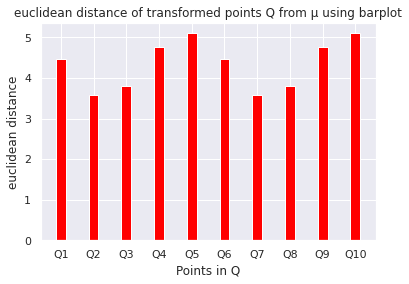

In [ ]:
#plotting barplot of Q
plt.bar(keys_Q,euclidean_distance_Q , color ='red',
        width = 0.3)
 
plt.xlabel("Points in Q")
plt.ylabel("euclidean distance")
plt.title("euclidean distance of transformed points Q from µ using barplot")
plt.show()

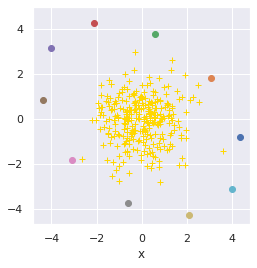

In [ ]:
plt.plot(x_new, y_new,'+',color='gold',label='datapoints')
for j in range(10):
    plt.scatter(x_Q[j], y_Q[j])
plt.xlabel('x')
plt.axis('square')
plt.show()

In [ ]:
# Initially the distance of the points from the mean is constant i.e 5 for all the points P in the circle (x^2)+(y^2)=25.